In [1]:
import json
import os
import sys
root = os.path.dirname(os.getcwd())
sys.path.append(root)
sys.path

['/Users/ckausik/.pyenv/versions/3.13.6/lib/python313.zip',
 '/Users/ckausik/.pyenv/versions/3.13.6/lib/python3.13',
 '/Users/ckausik/.pyenv/versions/3.13.6/lib/python3.13/lib-dynload',
 '',
 '/Users/ckausik/.pyenv/versions/py313/lib/python3.13/site-packages',
 '/Users/ckausik/Documents/GitHub/crossword-clue-generator']

## Create a dataset 

### Old stuff

In [496]:
wordlist = open("../data/core.txt").read().splitlines()

In [497]:
import random

In [498]:
big_dataset = []
for word in wordlist:
    if '-' in word:
        big_dataset.append({"answer": word, "enumeration": "-".join([str(len(part)) for part in word.split('-')])})
        # print(small_dataset[-1])
        # break
    elif '_' in word:
        clean_word = word.replace('_', ' ')
        big_dataset.append({"answer": clean_word, "enumeration": " ".join([str(len(part)) for part in clean_word.split(' ')])})
        # print(small_dataset[-1])
        # break
    else:
        big_dataset.append({"answer": word, "enumeration": str(len(word))})
        # print(small_dataset[-1])
        # break

In [499]:
import re
# function to create single word, multi word and hyphenated word datasets
def create_word_datasets(data):
    single_word_set = [item for item in data if len(re.split(r"[ -]", item['answer'])) == 1]
    multi_word_set = [item for item in data if len(re.split(" ", item['answer'])) > 1]
    hyphenated_set = [item for item in data if '-' in item['answer']]
    return single_word_set, multi_word_set, hyphenated_set

# function to create a dictionary of number of words in a list of multi word or hyphenated datapoints (dictionaries with answer and enumeration)
def create_word_count_dict(data):
    word_count_dict = {}
    for item in data:
        answer = item['answer']
        word_count = len(re.split(r"[ -]", answer))
        if word_count > 1:  # only consider multi-word or hyphenated answers
            if word_count not in word_count_dict:
                word_count_dict[word_count] = 0
            word_count_dict[word_count] += 1
    return word_count_dict

In [500]:
s,m,h = create_word_datasets(big_dataset)
len(s), len(m), len(h)

(32461, 8878, 1545)

In [501]:
dataset = random.sample(big_dataset, 10000)

In [502]:
dataset_minor = [item for item in big_dataset if len(re.split(r"[ -]", item['answer'])) > 2]
dataset = [item for item in dataset if len(re.split(r"[ -]", item['answer'])) <= 2]

In [503]:
train_pct = 0.8
val_pct = 0.05
train_size = int(len(dataset) * train_pct)
val_size = int(len(dataset) * val_pct)
train_set = dataset[:train_size]
val_set = dataset[train_size:train_size + val_size]
test_set = dataset[train_size + val_size:]

In [504]:
len(train_set), len(val_set), len(test_set)

(7879, 492, 1478)

In [505]:
minor_train_size = int(len(dataset_minor) * train_pct)
minor_val_size = int(len(dataset_minor) * val_pct)
minor_train_set = dataset_minor[:minor_train_size]
minor_val_set = dataset_minor[minor_train_size:minor_train_size + minor_val_size]
minor_test_set = dataset_minor[minor_train_size + minor_val_size:]

In [506]:
len(minor_train_set), len(minor_val_set), len(minor_test_set)

(573, 35, 109)

In [507]:
train_set = train_set + minor_train_set
val_set = val_set + minor_val_set
test_set = test_set + minor_test_set

In [508]:
s, m, h = create_word_datasets(test_set)
len(s), len(m), len(h)
create_word_count_dict(s), create_word_count_dict(m), create_word_count_dict(h)

({}, {2: 290, 3: 86, 4: 6}, {2: 38, 3: 18})

In [509]:
# json.dump(train_set, open("../data/train_small_dataset.json", 'w'), indent=2)
# json.dump(val_set, open("../data/val_small_dataset.json", 'w'), indent=2)
# json.dump(test_set, open("../data/test_small_dataset.json", 'w'), indent=2)

### Other datasets

In [510]:
import pandas as pd

In [537]:
df = pd.read_csv('../data/clues_larger.csv', on_bad_lines='skip')
# df = pd.read_csv('../data/clues.tsv', sep='\t', on_bad_lines='skip', engine='python')

In [538]:
df

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
0,1,"Acquisitive chap, as we see it (8)",COVETOUS,Acquisitive,1a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
1,2,Back yard fencing weak and sagging (6),DROOPY,sagging,5a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
2,3,"Stripping off uniform, love holding colonel's ...",UNCLOTHING,Stripping,8a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
3,4,Without a mark where they should be gained (4),EXAM,where they should be gained,9a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
4,5,"Put a stop to Rugby's foul school leader (5,2,...",KNOCK ON THE HEAD,Put a stop to,10a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
...,...,...,...,...,...,...,...,...,...
8995,8996,In the morning getting bigger-than-average hol...,AMOS,holy book,22a,2019-03-01,Times Quick Cryptic No 1299,https://times-xwd-times.livejournal.com/209780...,times_xwd_times
8996,8997,"Cathedral maps, about to be introduced (8)",CHARTRES,Cathedral,1d,2019-03-01,Times Quick Cryptic No 1299,https://times-xwd-times.livejournal.com/209780...,times_xwd_times
8997,8998,Supper? Yours truly will have a litre! (4),MEAL,Supper?,2d,2019-03-01,Times Quick Cryptic No 1299,https://times-xwd-times.livejournal.com/209780...,times_xwd_times
8998,8999,Fall over in America (6),AUTUMN,Fall over in America,3d,2019-03-01,Times Quick Cryptic No 1299,https://times-xwd-times.livejournal.com/209780...,times_xwd_times


In [1]:
words = df['answer'].unique()

NameError: name 'df' is not defined

In [ ]:
train_pct = 0.8
val_pct = 0.05


In [533]:
df_ans = df.groupby('answer').value_counts()

<Axes: >

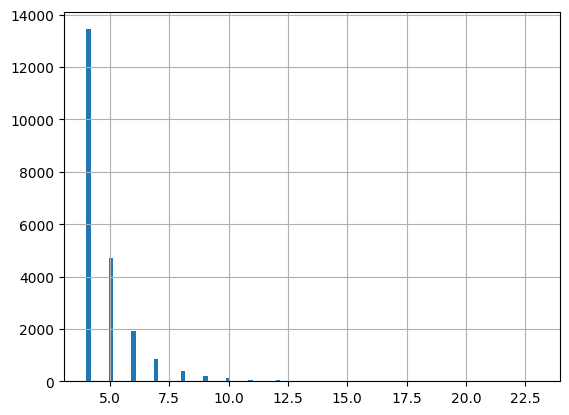

In [529]:
df_ans[df_ans>3].hist(bins=100)

In [513]:
# find all answers with more than one word, separated by a space or a hyphen
multi_word_answers = df[df['answer'].str.split(" ").str.len() > 1]

In [514]:
multi_word_answers

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
4,5,"Put a stop to Rugby's foul school leader (5,2,...",KNOCK ON THE HEAD,Put a stop to,10a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
9,10,"Heady mixture of qualities nurse developed (7,7)",TEQUILA SUNRISE,Heady mixture,21a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
23,24,Complaint received by a miserly sort presentin...,ANT BEAR,sort presenting a threat to workers,16d,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
27,28,"European bank invests — diving in here? (4,3)",DEEP END,diving in here,20d,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
59,60,"Startle, prepared to keep ace and not lead (4,...",TAKE A BACK SEAT,not lead,1a,2018-05-17,Times 27040,https://times-xwd-times.livejournal.com/194295...,times_xwd_times
...,...,...,...,...,...,...,...,...,...
943,944,"Are nitrates changing brewing equipment? (3,8)",TEA STRAINER,brewing equipment,8d,2020-07-13,QC 1655,https://times-xwd-times.livejournal.com/237196...,times_xwd_times
969,970,"Serving in army club, one left out cementing t...",SOLDERING IRON,cementing tool,4d,2018-06-25,Times 27073,https://times-xwd-times.livejournal.com/196421...,times_xwd_times
983,984,Personal target leading to footballer’s error ...,OWN GOAL,footballer’s error,10a,2019-02-25,QC 1295,https://times-xwd-times.livejournal.com/209587...,times_xwd_times
994,995,"Sweet having me in calmer race, somehow (5,7)",CREME CARAMEL,Sweet,3d,2019-02-25,QC 1295,https://times-xwd-times.livejournal.com/209587...,times_xwd_times


In [515]:
df.sample(20)

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
71,72,Maxim’s garden feature? (5),GNOME,Maxim,25a,2018-05-17,Times 27040,https://times-xwd-times.livejournal.com/194295...,times_xwd_times
533,534,No fewer than fifty each in a test (not Englis...,AT LEAST,No fewer than,21d,2019-12-30,Times 27547,https://times-xwd-times.livejournal.com/226390...,times_xwd_times
475,476,"Raven’s cry, primarily croaky and whiny (3)",CAW,Raven’s cry,20d,2016-07-22,Times Quick Cryptic 619,https://times-xwd-times.livejournal.com/156160...,times_xwd_times
170,171,Cheating player playing craps hard (9),CARDSHARP,NaN,1a,2017-11-13,Times Quick Cryptic 960,https://times-xwd-times.livejournal.com/184243...,times_xwd_times
542,543,One who stands against the old decaying gates ...,AGEIST,NaN,6d,2019-06-10,Times Quick Cryptic 1370,https://times-xwd-times.livejournal.com/215435...,times_xwd_times
854,855,Convert home to church in stretch of land for ...,TERRACE,row of houses,20d,2020-06-13,Jumbo 1443,https://times-xwd-times.livejournal.com/235507...,times_xwd_times
260,261,"Drink from a small can, briefly (4)",ASTI,Drink,6a,2018-03-04,Sunday Times 4787,https://times-xwd-times.livejournal.com/190358...,times_xwd_times
678,679,Discovered painting in prison: sentence not wa...,PENTIMENTO,Discovered painting,38d,2017-02-25,Jumbo 1250,https://times-xwd-times.livejournal.com/169221...,times_xwd_times
403,404,Utopian novel italicised (10),IDEALISTIC,Utopian,13a,2020-10-26,Times 27805,https://times-xwd-times.livejournal.com/242946...,times_xwd_times
877,878,Deep thought: odd state to beset one (10),RUMINATION,Deep thought,12a,2018-01-20,Times Cryptic No 26934,https://times-xwd-times.livejournal.com/188101...,times_xwd_times


### Download the george ho dataset

In [ ]:
# !curl -L "https://cryptics.georgeho.org/data.db" -o data.db

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187M    0  187M    0     0   750k      0 --:--:--  0:04:15 --:--:--   99k:00:06 --:--:-- 6491k --:--:--  417k 0:00:50 --:--:--  619k0 --:--:--  0:00:55 --:--:--  912kk      0 --:--:--  0:02:04 --:--:--  713k     0 --:--:--  0:02:12 --:--:-- 1130k-:--:--  0:02:29 --:--:--  933k02:40 --:--:-- 1182k--:--:--  179k:14 --:--:--  193k--:--:--  0:04:00 --:--:-- 61810


In [543]:
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq

DB_PATH = "../data/george_ho.db"
OUT_PARQUET = "../data/george_ho.parquet"
TABLE = "clues"
CHUNK_ROWS = 100_000  # tune (50k–250k is usually fine)

def convert_to_parquet():
    con = sqlite3.connect(DB_PATH)
    cur = con.cursor()

    # Get column names
    cur.execute(f"PRAGMA table_info({TABLE})")
    cols = [row[1] for row in cur.fetchall()]  # row[1] = column name
    col_sql = ", ".join([f'"{c}"' for c in cols])

    # Count total rows (for progress)
    cur.execute(f"SELECT COUNT(*) FROM {TABLE}")
    (total_rows,) = cur.fetchone()

    writer = None
    offset = 0

    try:
        while offset < total_rows:
            cur.execute(
                f"SELECT {col_sql} FROM {TABLE} LIMIT ? OFFSET ?",
                (CHUNK_ROWS, offset),
            )
            rows = cur.fetchall()
            if not rows:
                break

            # Convert chunk to Arrow table
            # (columns are inferred; if you want strict types, we can add a schema)
            batch_cols = list(zip(*rows)) if rows else [[] for _ in cols]
            arrays = [pa.array(batch_cols[i]) for i in range(len(cols))]
            table = pa.Table.from_arrays(arrays, names=cols)

            if writer is None:
                writer = pq.ParquetWriter(
                    OUT_PARQUET,
                    table.schema,
                    compression="zstd",  # excellent compression/speed tradeoff
                    use_dictionary=True,
                )

            writer.write_table(table)

            offset += len(rows)
            print(f"Wrote {offset}/{total_rows} rows")

    finally:
        if writer is not None:
            writer.close()
        con.close()

    print(f"Done -> {OUT_PARQUET}")

### Explore the george ho dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_parquet("../data/george_ho.parquet")

19596


/var/folders/7y/m7c5pl812yb6x0__xx22cvrw0000gn/T/ipykernel_7646/2810708254.py:12: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(bin_midpoints), np.log(bin_counts), alpha=0.7)


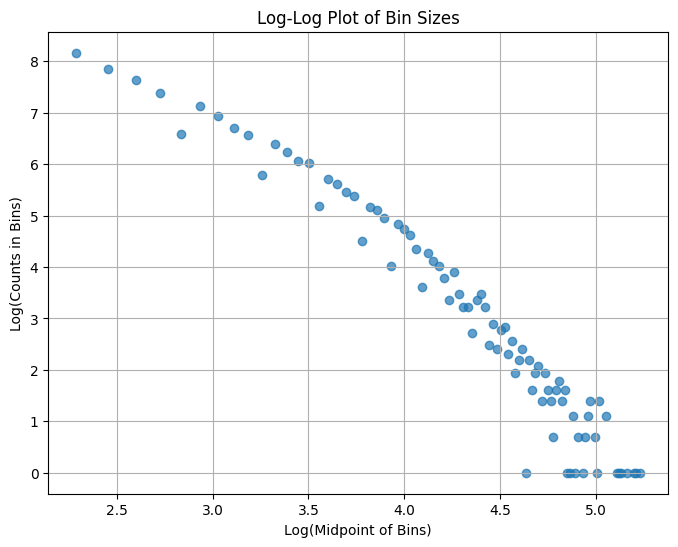

In [5]:
import numpy as np
import matplotlib.pyplot as plt
df_counts = df["answer"].value_counts().reset_index()
df_counts.columns = ["answer", "count"]
df_counts_sliced = df_counts.query("8<count<200")
print(len(df_counts_sliced))
# print a log log plot of the size of bins and the midpoint of bins with n_bins
n_bins = 100
bin_counts, bin_edges = np.histogram(df_counts_sliced["count"], bins=n_bins)
bin_midpoints = np.sqrt(bin_edges[1:] * bin_edges[:-1])
plt.figure(figsize=(8, 6))
plt.scatter(np.log(bin_midpoints), np.log(bin_counts), alpha=0.7)
plt.title("Log-Log Plot of Bin Sizes")
plt.xlabel("Log(Midpoint of Bins)")
plt.ylabel("Log(Counts in Bins)")
plt.grid()
plt.show()

In [6]:
df

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
0,1,"Acquisitive chap, as we see it (8)",COVETOUS,Acquisitive,1a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
1,2,Back yard fencing weak and sagging (6),DROOPY,sagging,5a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
2,3,"Stripping off uniform, love holding colonel's ...",UNCLOTHING,Stripping,8a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
3,4,Without a mark where they should be gained (4),EXAM,where they should be gained,9a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
4,5,"Put a stop to Rugby's foul school leader (5,2,...",KNOCK ON THE HEAD,Put a stop to,10a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
...,...,...,...,...,...,...,...,...,...
660608,663648,"You reportedly lead attack, getting reprimand (7)",UPBRAID,reprimand,18d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44
660609,663649,"Delay punishment given to criminal (4,3)",TIME LAG,Delay,19d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44
660610,663650,Gather case of Sancerre will rise in value (6),ESTEEM,value,20d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44
660611,663651,Open a place to drink in Paris? (5),UNBAR,Open,22d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44


In [7]:
train_words = pd.read_csv("../data/train_words.csv", header=None)[0].tolist()
val_words = pd.read_csv("../data/val_words.csv", header=None)[0].tolist()
test_words = pd.read_csv("../data/test_words.csv", header=None)[0].tolist()

In [8]:
df_train = df[df["answer"].isin(train_words)]
df_val = df[df["answer"].isin(val_words)]
df_test = df[df["answer"].isin(test_words)]

### Embed answers and visualize embeddings

In [9]:
import sentence_transformers

model = sentence_transformers.SentenceTransformer("all-MiniLM-L6-v2")
# embed train, val and test sets
train_embeddings = model.encode(train_words, show_progress_bar=True)
val_embeddings = model.encode(val_words, show_progress_bar=True)
test_embeddings = model.encode(test_words, show_progress_bar=True)

Batches:   0%|          | 0/2969 [00:00<?, ?it/s]

Batches:   0%|          | 0/186 [00:00<?, ?it/s]

Batches:   0%|          | 0/557 [00:00<?, ?it/s]

In [10]:
# visualize train val and test embeddings with umap, different colors for all three
import umap
import matplotlib.pyplot as plt

# Combine all embeddings
all_embeddings = np.concatenate([train_embeddings, val_embeddings, test_embeddings])
labels = ['train'] * len(train_embeddings) + ['val'] * len(val_embeddings) + ['test'] * len(test_embeddings)

# Reduce dimensions with UMAP
umap = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.0, metric='cosine')
all_embeddings_2d = umap.fit_transform(all_embeddings)

In [11]:
import plotly.express as px
# Plot
fig = px.scatter(x=all_embeddings_2d[:, 0], y=all_embeddings_2d[:, 1], color=list(map({"train": "green", "val": "blue", "test": "red"}.get, labels)),
                 hover_name=train_words + val_words + test_words, size_max=0.5,
                 color_continuous_scale='viridis', title="UMAP visualization of embeddings")
fig.show()

### Process df

In [13]:
import pandas as pd
import re

def process_crossword_df(df: pd.DataFrame) -> pd.DataFrame:
    # Extract enumeration at end of clue, e.g. "(6)" or "(3,4)"
    enum_pattern = r"\(([^()]*)\)\s*$"

    enumeration = df["clue"].str.extract(enum_pattern)[0]

    # Remove enumeration from clue text
    clue_clean = df["clue"].str.replace(enum_pattern, "", regex=True)

    return pd.DataFrame({
        "answer": df["answer"].str.strip(),
        "clue": clue_clean.str.strip(),
        "enumeration": enumeration.str.strip(),
    })

In [14]:
df_train

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
1,2,Back yard fencing weak and sagging (6),DROOPY,sagging,5a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
2,3,"Stripping off uniform, love holding colonel's ...",UNCLOTHING,Stripping,8a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
3,4,Without a mark where they should be gained (4),EXAM,where they should be gained,9a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
5,6,Foreign letter coming in is the French letter (7),EPISTLE,letter,11a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
7,8,"At first, bear one fruit or another (7)",BANANAS,another,15a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
...,...,...,...,...,...,...,...,...,...
660608,663648,"You reportedly lead attack, getting reprimand (7)",UPBRAID,reprimand,18d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44
660609,663649,"Delay punishment given to criminal (4,3)",TIME LAG,Delay,19d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44
660610,663650,Gather case of Sancerre will rise in value (6),ESTEEM,value,20d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44
660611,663651,Open a place to drink in Paris? (5),UNBAR,Open,22d,2023-06-21,Daily Telegraph 30332,http://bigdave44.com/2023/06/21/dt-30332/,bigdave44


In [29]:
df_train_final = process_crossword_df(df_train)
df_val_final = process_crossword_df(df_val)
df_test_final = process_crossword_df(df_test)

In [30]:
df_train_final.query("enumeration.isna()")

,answer,clue,enumeration
581,SLUGGISH,Moving slowly or like a shot?,NaN
582,LOGO,See and repair device,NaN
584,SELF-PORTRAIT,Abandoned airports left one by one?,NaN
585,MAY QUEEN,Miss a festival’s main attraction,NaN
589,ILLUSTRATION,Bad American art turned into rough sketch?,NaN
...,...,...,...
660404,MISS,Seasonal Quick Crossword Pun:,NaN
660433,SIOUX,Crossword Pun:,NaN
660466,T,specific favourite but there were a number of ...,NaN
660555,Q,"lurkers! Very enjoyable, my winners are 13&23a...",NaN


In [31]:
# write a function to write the enumeration of an answer ("6" or "3-4" or "5 6")
def enumerate_answer(answer):
    if isinstance(answer, str):
        if "-" in answer:
            answer = answer.split("-")
            return "-".join(str(len(part)) for part in answer)
        else:
            answer = answer.split(" ")
            return " ".join(str(len(part)) for part in answer)

# add enumeration for missing answers by enumerating answers
df_train_final.loc[df_train_final["enumeration"].isna(), "enumeration"] = df_train_final.loc[df_train_final["enumeration"].isna(), "answer"].apply(enumerate_answer)
df_val_final.loc[df_val_final["enumeration"].isna(), "enumeration"] = df_val_final.loc[df_val_final["enumeration"].isna(), "answer"].apply(enumerate_answer)
df_test_final.loc[df_test_final["enumeration"].isna(), "enumeration"] = df_test_final.loc[df_test_final["enumeration"].isna(), "answer"].apply(enumerate_answer)

In [32]:
df_train_final.query("enumeration.isna()")
df_val_final.query("enumeration.isna()")
df_test_final.query("enumeration.isna()")

,answer,clue,enumeration


,answer,clue,enumeration
50,RAVIOLI,Soft cases used by opera violinists,7
65,DENARII,"Republic extremely embarrassed, withdrawing cu...",7
131,EGALITARIAN,"Opposing discrimination, say, came down on a p...",11
157,CHIAROSCURO,Painting Caruso performing with choir,11
170,CARDSHARP,Cheating player playing craps hard,9
...,...,...,...
660551,CROSIER,Conservative leading more promising staff,7
660552,TREASON,Iscariot finally with motive for treachery,7
660589,INTER,Bury FC,5
660602,NATTIER,Smarter bit of couture: it tantalises when twi...,7


### Generate train test val splits for answers

In [33]:
import numpy as np
words = df['answer'].unique()
np.random.shuffle(words)

In [48]:
train_pct = 0.8
val_pct = 0.05
train_words = words[:int(len(words) * train_pct)]
val_words = words[int(len(words) * train_pct):int(len(words) * (train_pct + val_pct))]
test_words = words[int(len(words) * (train_pct + val_pct)):]

In [49]:
train_words = [word for word in train_words if isinstance(word, str)]
val_words = [word for word in val_words if isinstance(word, str)]
test_words = [word for word in test_words if isinstance(word, str)]

In [66]:
import re
# function to create single word, multi word and hyphenated word datasets
def create_word_sets(data):
    single_word_set = [item for item in data if isinstance(item, str) and len(re.split(r"[ -]", item)) == 1]
    multi_word_set = [item for item in data if isinstance(item, str) and len(re.split(" ", item)) > 1]
    hyphenated_set = [item for item in data if isinstance(item, str) and '-' in item]
    return single_word_set, multi_word_set, hyphenated_set

# function to create a dictionary of number of words in a list of multi word or hyphenated datapoints (dictionaries with answer and enumeration)
def create_word_count_dict(data):
    word_count_dict = {}
    for answer in data:
        if not isinstance(answer, str):
            continue
        word_count = len(re.split(r"[ -]", answer))
        if word_count > 1:  # only consider multi-word or hyphenated answers
            if word_count not in word_count_dict:
                word_count_dict[word_count] = 0
            word_count_dict[word_count] += 1
    return word_count_dict

In [67]:
[word for word in df['answer'].unique() if not isinstance(word, str)]

[None]

In [68]:
s,m,h = create_word_sets(list(test_words))
len(s), len(m), len(h)

(12426, 4818, 624)

In [ ]:
# # save train val and test words in ../data/
# pd.Series(train_words).to_csv('../data/train_words.csv', index=False, header=False)
# pd.Series(val_words).to_csv('../data/val_words.csv', index=False, header=False)
# pd.Series(test_words).to_csv('../data/test_words.csv', index=False, header=False)

## Evaluate core datapoint generation message